<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/activation_fun_deriv_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot some neural net activation functions and their derivatives
Based on sec 4.1 of
 http://d2l.ai/chapter_multilayer-perceptrons/mlp.html


In [1]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=1)

In [2]:
!mkdir figures

In [3]:
#!wget https://raw.githubusercontent.com/d2l-ai/d2l-en/master/d2l/torch.py -q -O d2l.py
#import d2l

In [4]:
import torch
from torch import nn
from torch.nn import functional as F

In [9]:
x = torch.arange(-4.0, 4.0, 0.1, requires_grad=True)
fns = [torch.sigmoid,
       torch.relu,
       torch.nn.LeakyReLU(negative_slope=0.1),
       torch.nn.ELU(alpha=1.0),
       torch.nn.GELU()]
names = ['sigmoid', 'relu', 'leaky-relu', 'elu', 'gelu']

# evaluate functions and their gradients on a grid of points
xs = x.detach()
fdict = {}
gdict = {}
for i in range(len(fns)):
    fn = fns[i]
    name = names[i]
    y = fn(x)
    fdict[name] = y.detach() # vector of fun    
    y.backward(torch.ones_like(x), retain_graph=True) # returns gradient at each point
    gdict[name] = torch.clone(x.grad) # gradient wrt x(i)
    x.grad.data.zero_() # clear out old gradient for next iteration


    

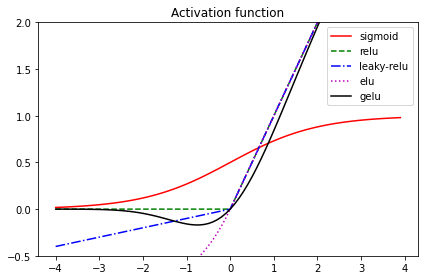

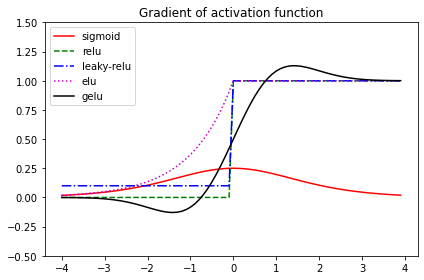

In [10]:
# Plot the funcitons
styles = ['r-', 'g--', 'b-.', 'm:', 'k-']
ax = plt.subplot()
for i, name in enumerate(names): 
    lab = f'{name}'
    ax.plot(xs, fdict[name], styles[i], label=lab)
ax.set_ylim(-0.5,2)
ax.legend()
plt.title('Activation function')
plt.tight_layout()
plt.savefig(f'figures/activation-funs.pdf', dpi=300)
plt.show()

ax = plt.subplot()
for i, name in enumerate(names):
    lab = f'{name}'
    ax.plot(xs, gdict[name], styles[i], label=lab)
ax.set_ylim(-0.5,1.5)
ax.legend()
plt.title('Gradient of activation function')
plt.tight_layout()
plt.savefig(f'figures/activation-funs-grad.pdf', dpi=300)
plt.show()

    

In [11]:
!ls figures

activation-funs-grad.pdf  activation-funs.pdf
